In [1]:
import numpy as np      
import matplotlib.pyplot as plt 
import scipy.io.wavfile 
import subprocess
import librosa
import librosa.display
import IPython.display as ipd

from pathlib import Path, PurePath   
from tqdm.notebook import tqdm

## Utility functions

In [2]:
def convert_mp3_to_wav(audio:str) -> str:  
    """Convert an input MP3 audio track into a WAV file.

    Args:
        audio (str): An input audio track.

    Returns:
        [str]: WAV filename.
    """
    if audio[-3:] == "mp3":
        wav_audio = audio[:-3] + "wav"
        if not Path(wav_audio).exists():
                subprocess.check_output(f"ffmpeg -i {audio} {wav_audio}", shell=True)
        return wav_audio
    
    return audio

def plot_spectrogram_and_picks(track:np.ndarray, sr:int, peaks:np.ndarray, onset_env:np.ndarray) -> None:
    """[summary]

    Args:
        track (np.ndarray): A track.
        sr (int): Aampling rate.
        peaks (np.ndarray): Indices of peaks in the track.
        onset_env (np.ndarray): Vector containing the onset strength envelope.
    """
    times = librosa.frames_to_time(np.arange(len(onset_env)),
                            sr=sr, hop_length=HOP_SIZE)

    plt.figure()
    ax = plt.subplot(2, 1, 2)
    D = librosa.stft(track)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                            y_axis='log', x_axis='time')
    plt.subplot(2, 1, 1, sharex=ax)
    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[peaks], 0,
            onset_env.max(), color='r', alpha=0.8,
            label='Selected peaks')
    plt.legend(frameon=True, framealpha=0.8)
    plt.axis('tight')
    plt.tight_layout()
    plt.show()

def load_audio_picks(audio, duration, hop_size):
    """[summary]

    Args:
        audio (string, int, pathlib.Path or file-like object): [description]
        duration (int): [description]
        hop_size (int): 

    Returns:
        tuple: Returns the audio time series (track) and sampling rate (sr), a vector containing the onset strength envelope
        (onset_env), and the indices of peaks in track (peaks).
    """
    try:
        track, sr = librosa.load(audio, duration=duration)
        onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
        peaks = librosa.util.peak_pick(onset_env, 10, 10, 10, 10, 0.5, 0.5)
    except Error as e:
        print('An error occurred processing ', str(audio))
        print(e)

    return track, sr, onset_env, peaks
    
    

## Settings

In [3]:
N_TRACKS = 1413
HOP_SIZE = 512
DURATION = 30 # TODO: to be tuned!
THRESHOLD = 5 # TODO: to be tuned!

In [4]:
data_folder = Path("./data/mp3s-32k/")
mp3_tracks = data_folder.glob("*/*/*.mp3")
tracks = data_folder.glob("*/*/*.wav")

In [5]:
songs = list(data_folder.glob("*/*/*.wav"))
queries = list(Path("./data/queries/").glob("*.wav"))

## Preprocessing

## Audio signals

## Minhash

In [6]:
from Ex1_lib import *

## Query test

In [7]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

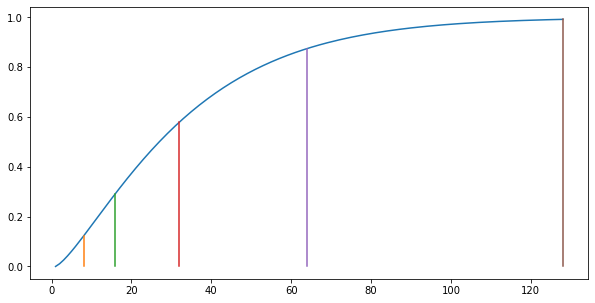

In [8]:
b1, bands, thresholds, final_th1 = find_band_from_threshold(0.1)
b2, _, _, final_th2 = find_band_from_threshold(0.35)
b3, _, _, final_th3 = find_band_from_threshold(0.5)
b4, _, _, final_th4 = find_band_from_threshold(0.80)
b5, _, _, final_th5 = find_band_from_threshold(1)

plt.figure(figsize=(10,5))
plt.plot(bands, thresholds);
plt.plot([b1,b1],[0, final_th1]);
plt.plot([b2,b2],[0, final_th2]);
plt.plot([b3,b3],[0, final_th3]);
plt.plot([b4,b4],[0, final_th4]);
plt.plot([b5,b5],[0, final_th5]);

In [9]:
bands_128 = [b1,b2,b3,b4,b5]
bands_128

[8, 16, 32, 64, 128]

In [10]:
#shinlges = make_all_fingerprints(duration=30, songs=songs)
#save_object(shinlges, "./data/fingerprints/peaks_frequences/fings_dur_30_hop_0.plk")
shinlges = read_object("./data/fingerprints/peaks_indices/peaks_dur_30_hop_0.plk")
minhashes = []

for fing, song in shinlges:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashes.append(m)

shinlgesq = get_all_peaks(duration=5, songs=queries)
save_object(shinlgesq, "./data/fingerprints/peaks_indices/peaksq_dur_5_hop_0.plk")
#shinlgesq = read_object("./data/fingerprints/peaks_indices/peaksq_dur_5_hop_0.plk)
minhashesq = []

for fing, song in shinlgesq:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashesq.append(m)

  0%|          | 0/10 [00:00<?, ?it/s]

In [11]:
query(bands_128, minhashes, minhashesq)

Query with 8 number of bands:



,track10.wav
similarity,
0.062500,12-Breathing_in_fumes.wav
0.062500,06-Nobody_s_Fault.wav
0.046875,15-Bicycle_Race_1991_Remix_.wav
0.039062,08-I_Wanna_Melt_With_U.wav
0.039062,02-Brat.wav
0.031250,11-1000_Oceans.wav
0.031250,10-Like_Spinning_Plates.wav
0.031250,08-The_Red_Strokes.wav
0.031250,05-Night_Vision.wav


,track9.wav
similarity,
0.039062,06-Nobody_s_Fault.wav
0.031250,09-Words_Of_Love.wav
0.031250,09-Sweet_Baby.wav
0.031250,06-Vulnerable.wav
0.031250,05-Who_s_Gonna_Ride_Your_Wild_Horses.wav
0.031250,03-A_question_of_lust.wav
0.023438,10-The_Wanderer.wav
0.023438,10-Mr_Blue.wav
0.023438,06-Dancing_Nancies.wav


,track4.wav
similarity,
0.171875,04-Ob-La-Di_Ob-La-Da.wav
0.085938,05-Machines_Back_To_Humans_.wav
0.062500,10-No_Surprises.wav
0.062500,02-Bad_Sneakers.wav
0.054688,10-Hats_Off_To_Roy_Harper.wav
...,...
0.007812,03-Bells_For_Her.wav
0.007812,02-Before_You_Accuse_Me.wav
0.007812,01-Skies_the_Limit.wav


,track6.wav
similarity,
0.125000,05-Heartbreaker.wav
0.070312,01-Where_the_Streets_Have_No_Name.wav
0.054688,10-The_Top.wav
0.054688,06-Sweet_Emotion.wav
0.054688,04-Let_s_Pretend_We_re_Married.wav
...,...
0.007812,04-Glory_Of_The_80_s.wav
0.007812,03-The_Power_of_Orange_Knickers.wav
0.007812,03-I_m_In_Love_With_My_Car.wav


,track3.wav
similarity,
0.210938,07-October.wav
0.039062,13-I_m_In_Love_With_My_Car.wav
0.039062,04-Every_Now_And_Then.wav
0.039062,01-Black_Celebration.wav
0.031250,11-Ireland.wav
0.031250,08-Shanti-Ashtangi.wav
0.031250,06-Thin_Man.wav
0.031250,05-_Anesthesia_Pulling_Teeth.wav
0.031250,04-The_Ballad_Of_Dorothy_Parker.wav


,track2.wav
similarity,
0.140625,06-I_Want_To_Break_Free.wav
0.070312,08-Cowboy_Bill.wav
0.062500,08-King_Of_The_World.wav
0.062500,03-The_Last_Stop.wav
0.054688,10-All_The_Critics_Love_U_In_New_York.wav
...,...
0.007812,01-Tom_s_Diner.wav
0.007812,01-The_Look.wav
0.007812,01-Rock_In_This_Pocket_Song_Of_David_.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav
0.039062,12-Love_Is_Blindness.wav
0.039062,01-Love_in_Store.wav
0.023438,12-Everyday.wav
0.023438,08-The_Red_Strokes.wav
0.023438,08-Because.wav
0.023438,02-Commotion.wav
0.015625,07-Venus_de_Milo.wav
0.015625,06-Sleeps_With_Butterflies.wav


,track7.wav
similarity,
0.078125,12-You_Can_t_Do_That.wav
0.078125,10-Effigy.wav
0.062500,15-Strangeland.wav
0.062500,08-Red_Light.wav
0.062500,07-Blue_Light.wav
0.054688,07-The_Hand_That_Feeds.wav
0.046875,11-Monkey_in_Your_Soul.wav
0.046875,06-Only_over_You.wav
0.039062,11-Stolen_Away_On_55th_3rd.wav


,track8.wav
similarity,
0.242188,01-American_Idiot.wav
0.093750,13-She_Came_In_Through_The_Bathroom_Window.wav
0.093750,02-Babe_I_m_Gonna_Leave_You.wav
0.085938,01-Erotica.wav
0.078125,04-Thank_You.wav
...,...
0.007812,01-Tom_s_Diner.wav
0.007812,01-Rock_In_This_Pocket_Song_Of_David_.wav
0.007812,01-Rikki_Don_t_Lose_That_Number.wav


,track1.wav
similarity,
0.218750,03-Dream_On.wav
0.070312,08-Trip_Through_Your_Wires.wav
0.070312,07-Keep_Passing_The_Open_Windows.wav
0.070312,06-Automatic.wav
0.062500,34-_34.wav
...,...
0.007812,03-Sheer_Heart_Attack.wav
0.007812,03-Don_t_Take_Me_Alive.wav
0.007812,03-Bells_For_Her.wav





Query with 16 number of bands:



,track10.wav
similarity,
0.109375,01-Black_Friday.wav
0.078125,14-The_Beekeeper.wav
0.062500,12-Breathing_in_fumes.wav
0.062500,06-Nobody_s_Fault.wav
0.054688,07-watercolours_in_the_rain.wav
...,...
0.007812,02-Rodeo.wav
0.007812,02-Old_Dirt_Hill_Bring_That_Beat_Back_.wav
0.007812,02-Dreams.wav


,track9.wav
similarity,
0.039062,06-Nobody_s_Fault.wav
0.031250,09-Words_Of_Love.wav
0.031250,09-Sweet_Baby.wav
0.031250,06-Vulnerable.wav
0.031250,05-Who_s_Gonna_Ride_Your_Wild_Horses.wav
0.031250,03-A_question_of_lust.wav
0.023438,10-The_Wanderer.wav
0.023438,10-Mr_Blue.wav
0.023438,06-Dancing_Nancies.wav


,track4.wav
similarity,
0.171875,04-Ob-La-Di_Ob-La-Da.wav
0.085938,08-Trip_Through_Your_Wires.wav
0.085938,05-Machines_Back_To_Humans_.wav
0.070312,01-Draw_the_Line.wav
0.062500,10-No_Surprises.wav
...,...
0.007812,02-Before_You_Accuse_Me.wav
0.007812,01-Skies_the_Limit.wav
0.007812,01-Rikki_Don_t_Lose_That_Number.wav


,track6.wav
similarity,
0.125000,05-Heartbreaker.wav
0.070312,01-Where_the_Streets_Have_No_Name.wav
0.054688,10-The_Top.wav
0.054688,06-Sweet_Emotion.wav
0.054688,04-Let_s_Pretend_We_re_Married.wav
...,...
0.007812,03-The_Power_of_Orange_Knickers.wav
0.007812,03-The_Boston_Rag.wav
0.007812,03-I_m_In_Love_With_My_Car.wav


,track3.wav
similarity,
0.210938,07-October.wav
0.054688,06-The_Change.wav
0.046875,02-Even_Better_Than_The_Real_Thing.wav
0.039062,13-I_m_In_Love_With_My_Car.wav
0.039062,12-Little_Star.wav
...,...
0.007812,03-The_Power_of_Orange_Knickers.wav
0.007812,03-Bye_Bye_Baby.wav
0.007812,02-Widow_s_Walk.wav


,track2.wav
similarity,
0.140625,06-I_Want_To_Break_Free.wav
0.070312,08-Cowboy_Bill.wav
0.070312,05-Go_to_Sleep.wav
0.062500,08-King_Of_The_World.wav
0.062500,03-The_Last_Stop.wav
...,...
0.007812,01-Rock_In_This_Pocket_Song_Of_David_.wav
0.007812,01-Rikki_Don_t_Lose_That_Number.wav
0.007812,01-My_Name_Is_Prince.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav
0.070312,13-Ireland.wav
0.070312,03-Over_The_Hills_And_Far_Away.wav
0.062500,07-I_would_die_4_u.wav
0.062500,05-Go_Your_Own_Way.wav
0.054688,09-Bad_Wisdom.wav
0.054688,03-Everywhere.wav
0.046875,11-Acrobat.wav
0.046875,10-Neighborhood_Girls.wav


,track7.wav
similarity,
0.250000,05-Go_Your_Own_Way.wav
0.078125,12-You_Can_t_Do_That.wav
0.078125,10-Effigy.wav
0.070312,07-I_would_die_4_u.wav
0.062500,15-Strangeland.wav
...,...
0.015625,06-Songbird.wav
0.015625,06-How_Beautiful_You_Are.wav
0.015625,02-Night_by_Night.wav


,track8.wav
similarity,
0.242188,01-American_Idiot.wav
0.093750,13-She_Came_In_Through_The_Bathroom_Window.wav
0.093750,02-Babe_I_m_Gonna_Leave_You.wav
0.085938,01-Erotica.wav
0.078125,04-Thank_You.wav
...,...
0.007812,01-Tom_s_Diner.wav
0.007812,01-Rock_In_This_Pocket_Song_Of_David_.wav
0.007812,01-Rikki_Don_t_Lose_That_Number.wav


,track1.wav
similarity,
0.218750,03-Dream_On.wav
0.093750,08-Happiness_Is_A_Warm_Gun.wav
0.078125,08-Behind_the_Mask.wav
0.078125,06-Yellow_Submarine.wav
0.070312,13-Rocky_Raccoon.wav
...,...
0.007812,02-Impressive_Instant.wav
0.007812,02-Even_Better_Than_The_Real_Thing.wav
0.007812,02-Bird_Mad_Girl.wav





Query with 32 number of bands:



,track10.wav
similarity,
0.109375,01-Black_Friday.wav
0.093750,12-Everyday.wav
0.078125,14-The_Beekeeper.wav
0.078125,10-Sun_King.wav
0.062500,12-Breathing_in_fumes.wav
...,...
0.007812,02-Dreams.wav
0.007812,02-Bad_Sneakers.wav
0.007812,01-In_Between_Days.wav


,track9.wav
similarity,
0.039062,06-Nobody_s_Fault.wav
0.031250,09-Words_Of_Love.wav
0.031250,09-Sweet_Baby.wav
0.031250,06-Vulnerable.wav
0.031250,05-Who_s_Gonna_Ride_Your_Wild_Horses.wav
0.031250,03-A_question_of_lust.wav
0.023438,10-The_Wanderer.wav
0.023438,10-Mr_Blue.wav
0.023438,06-Dancing_Nancies.wav


,track4.wav
similarity,
0.171875,04-Ob-La-Di_Ob-La-Da.wav
0.085938,08-Trip_Through_Your_Wires.wav
0.085938,05-Machines_Back_To_Humans_.wav
0.070312,12-Shadow_Of_A_Doubt.wav
0.070312,01-Draw_the_Line.wav
...,...
0.007812,02-Before_You_Accuse_Me.wav
0.007812,01-Skies_the_Limit.wav
0.007812,01-Rikki_Don_t_Lose_That_Number.wav


,track6.wav
similarity,
0.125000,05-Heartbreaker.wav
0.070312,01-Where_the_Streets_Have_No_Name.wav
0.054688,10-The_Top.wav
0.054688,06-Sweet_Emotion.wav
0.054688,04-Let_s_Pretend_We_re_Married.wav
...,...
0.007812,03-Stuck_With_Me.wav
0.007812,03-I_m_In_Love_With_My_Car.wav
0.007812,02-The_Ledge.wav


,track3.wav
similarity,
0.210938,07-October.wav
0.054688,06-The_Change.wav
0.046875,02-Even_Better_Than_The_Real_Thing.wav
0.039062,13-I_m_In_Love_With_My_Car.wav
0.039062,12-Little_Star.wav
...,...
0.007812,02-Impressive_Instant.wav
0.007812,02-Club_America.wav
0.007812,01-Survival.wav


,track2.wav
similarity,
0.140625,06-I_Want_To_Break_Free.wav
0.070312,10-Mr_Blue.wav
0.070312,08-Cowboy_Bill.wav
0.070312,05-Go_to_Sleep.wav
0.062500,08-King_Of_The_World.wav
...,...
0.007812,01-Rikki_Don_t_Lose_That_Number.wav
0.007812,01-Open.wav
0.007812,01-My_Name_Is_Prince.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav
0.109375,02-Can_t_Go_Back.wav
0.085938,05-Spread_Your_Wings.wav
0.070312,13-Ireland.wav
0.070312,03-Over_The_Hills_And_Far_Away.wav
...,...
0.007812,03-Torture.wav
0.007812,02-Sit_Down_Stand_Up.wav
0.007812,02-Paranoid_Android.wav


,track7.wav
similarity,
0.250000,05-Go_Your_Own_Way.wav
0.078125,12-You_Can_t_Do_That.wav
0.078125,11-Homesick.wav
0.078125,10-Effigy.wav
0.078125,06-If_I_Had_It_All.wav
...,...
0.015625,01-Fight_Fire_With_Fire.wav
0.007812,09-Martha_My_Dear.wav
0.007812,04-Jump_In_The_Fire.wav


,track8.wav
similarity,
0.242188,01-American_Idiot.wav
0.125000,08-If_You_Want.wav
0.093750,13-She_Came_In_Through_The_Bathroom_Window.wav
0.093750,04-99_9_F_.wav
0.093750,02-Babe_I_m_Gonna_Leave_You.wav
...,...
0.007812,01-Pagan_Baby.wav
0.007812,01-Over_Over.wav
0.007812,01-My_Name_Is_Prince.wav


,track1.wav
similarity,
0.218750,03-Dream_On.wav
0.093750,08-Happiness_Is_A_Warm_Gun.wav
0.078125,08-Behind_the_Mask.wav
0.078125,06-Yellow_Submarine.wav
0.070312,13-Rocky_Raccoon.wav
...,...
0.007812,02-Even_Better_Than_The_Real_Thing.wav
0.007812,02-Bird_Mad_Girl.wav
0.007812,01-Pagan_Baby.wav





Query with 64 number of bands:



,track10.wav
similarity,
0.109375,01-Black_Friday.wav
0.093750,12-Everyday.wav
0.078125,14-The_Beekeeper.wav
0.078125,10-Sun_King.wav
0.062500,12-Breathing_in_fumes.wav
...,...
0.007812,02-Dreams.wav
0.007812,02-Bad_Sneakers.wav
0.007812,01-In_Between_Days.wav


,track9.wav
similarity,
0.039062,06-Nobody_s_Fault.wav
0.039062,04-In_The_Eye.wav
0.031250,09-Words_Of_Love.wav
0.031250,09-Sweet_Baby.wav
0.031250,06-Vulnerable.wav
...,...
0.007812,01-We_Will_Rock_You.wav
0.007812,01-The_Song_Remains_The_Same.wav
0.007812,01-Spark.wav


,track4.wav
similarity,
0.171875,04-Ob-La-Di_Ob-La-Da.wav
0.085938,10-I_Can_t.wav
0.085938,08-Trip_Through_Your_Wires.wav
0.085938,05-Machines_Back_To_Humans_.wav
0.070312,12-Shadow_Of_A_Doubt.wav
...,...
0.007812,01-Crucify.wav
0.007812,01-Christopher_Tracy_s_Parade.wav
0.007812,01-Black_Friday.wav


,track6.wav
similarity,
0.125000,05-Heartbreaker.wav
0.070312,01-Where_the_Streets_Have_No_Name.wav
0.054688,10-The_Top.wav
0.054688,06-Sweet_Emotion.wav
0.054688,04-Let_s_Pretend_We_re_Married.wav
...,...
0.007812,02-Take_me_with_u.wav
0.007812,02-Friends.wav
0.007812,01-Packt_Like_Sardines_In_A_Crush.wav


,track3.wav
similarity,
0.210938,07-October.wav
0.054688,06-The_Change.wav
0.046875,02-Even_Better_Than_The_Real_Thing.wav
0.039062,13-I_m_In_Love_With_My_Car.wav
0.039062,12-Little_Star.wav
...,...
0.007812,02-Club_America.wav
0.007812,01-Survival.wav
0.007812,01-Radio_Ga_Ga.wav


,track2.wav
similarity,
0.140625,06-I_Want_To_Break_Free.wav
0.070312,10-Mr_Blue.wav
0.070312,08-Cowboy_Bill.wav
0.070312,05-Go_to_Sleep.wav
0.062500,08-King_Of_The_World.wav
...,...
0.007812,01-My_Name_Is_Prince.wav
0.007812,01-Mustapha.wav
0.007812,01-Music.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav
0.109375,02-Can_t_Go_Back.wav
0.085938,05-Spread_Your_Wings.wav
0.070312,13-Ireland.wav
0.070312,09-Not_That_Funny.wav
...,...
0.007812,02-Paranoid_Android.wav
0.007812,02-Men_in_a_War.wav
0.007812,02-Brat.wav


,track7.wav
similarity,
0.250000,05-Go_Your_Own_Way.wav
0.078125,12-You_Can_t_Do_That.wav
0.078125,11-Homesick.wav
0.078125,10-Effigy.wav
0.078125,06-If_I_Had_It_All.wav
...,...
0.007812,04-Jump_In_The_Fire.wav
0.007812,03-What_She_s_Doing_Now.wav
0.007812,03-Dream_On.wav


,track8.wav
similarity,
0.242188,01-American_Idiot.wav
0.125000,08-If_You_Want.wav
0.093750,13-She_Came_In_Through_The_Bathroom_Window.wav
0.093750,04-99_9_F_.wav
0.093750,02-Babe_I_m_Gonna_Leave_You.wav
...,...
0.007812,01-My_Name_Is_Prince.wav
0.007812,01-Magical_Mystery_Tour.wav
0.007812,"01-Love,_In_Itself.wav"


,track1.wav
similarity,
0.218750,03-Dream_On.wav
0.093750,08-Happiness_Is_A_Warm_Gun.wav
0.078125,08-Behind_the_Mask.wav
0.078125,06-Yellow_Submarine.wav
0.070312,13-Rocky_Raccoon.wav
...,...
0.007812,01-Packt_Like_Sardines_In_A_Crush.wav
0.007812,01-Music.wav
0.007812,01-Magical_Mystery_Tour.wav





Query with 128 number of bands:



,track10.wav
similarity,
0.109375,01-Black_Friday.wav
0.093750,12-Everyday.wav
0.078125,14-The_Beekeeper.wav
0.078125,10-Sun_King.wav
0.062500,12-Breathing_in_fumes.wav
...,...
0.007812,01-He_s_a_Man.wav
0.007812,01-Cracking.wav
0.007812,01-Black_Dog.wav


,track9.wav
similarity,
0.039062,06-Nobody_s_Fault.wav
0.039062,04-In_The_Eye.wav
0.031250,09-Words_Of_Love.wav
0.031250,09-Sweet_Baby.wav
0.031250,06-Vulnerable.wav
...,...
0.007812,01-We_Will_Rock_You.wav
0.007812,01-The_Song_Remains_The_Same.wav
0.007812,01-Spark.wav


,track4.wav
similarity,
0.171875,04-Ob-La-Di_Ob-La-Da.wav
0.085938,10-I_Can_t.wav
0.085938,08-Trip_Through_Your_Wires.wav
0.085938,05-Machines_Back_To_Humans_.wav
0.070312,12-Shadow_Of_A_Doubt.wav
...,...
0.007812,01-Black_Friday.wav
0.007812,01-Big_Love.wav
0.007812,01-Airbag.wav


,track6.wav
similarity,
0.125000,05-Heartbreaker.wav
0.070312,01-Where_the_Streets_Have_No_Name.wav
0.054688,10-The_Top.wav
0.054688,06-Sweet_Emotion.wav
0.054688,04-Let_s_Pretend_We_re_Married.wav
...,...
0.007812,01-My_Name_Is_Prince.wav
0.007812,01-Love_in_Store.wav
0.007812,01-Good_Times_Bad_Times.wav


,track3.wav
similarity,
0.210938,07-October.wav
0.054688,06-The_Change.wav
0.046875,02-Even_Better_Than_The_Real_Thing.wav
0.039062,13-I_m_In_Love_With_My_Car.wav
0.039062,12-Little_Star.wav
...,...
0.007812,01-My_Name_Is_Prince.wav
0.007812,01-Harleys_Indians_Riders_In_The_Sky_.wav
0.007812,01-Bodhisattva.wav


,track2.wav
similarity,
0.140625,06-I_Want_To_Break_Free.wav
0.070312,10-Mr_Blue.wav
0.070312,08-Cowboy_Bill.wav
0.070312,05-Go_to_Sleep.wav
0.062500,08-King_Of_The_World.wav
...,...
0.007812,01-Music.wav
0.007812,01-Magical_Mystery_Tour.wav
0.007812,"01-Love,_In_Itself.wav"


,track5.wav
similarity,
0.132812,06-Karma_Police.wav
0.109375,02-Can_t_Go_Back.wav
0.085938,05-Spread_Your_Wings.wav
0.070312,13-Ireland.wav
0.070312,09-Not_That_Funny.wav
...,...
0.007812,01-Harleys_Indians_Riders_In_The_Sky_.wav
0.007812,01-Crush_On_You.wav
0.007812,01-Black_Dog.wav


,track7.wav
similarity,
0.250000,05-Go_Your_Own_Way.wav
0.078125,12-You_Can_t_Do_That.wav
0.078125,11-Homesick.wav
0.078125,10-Effigy.wav
0.078125,06-If_I_Had_It_All.wav
...,...
0.007812,01-Pagan_Baby.wav
0.007812,01-I_Put_A_Spell_On_You.wav
0.007812,01-Harleys_Indians_Riders_In_The_Sky_.wav


,track8.wav
similarity,
0.242188,01-American_Idiot.wav
0.125000,08-If_You_Want.wav
0.093750,13-She_Came_In_Through_The_Bathroom_Window.wav
0.093750,04-99_9_F_.wav
0.093750,02-Babe_I_m_Gonna_Leave_You.wav
...,...
0.007812,01-My_Name_Is_Prince.wav
0.007812,01-Magical_Mystery_Tour.wav
0.007812,"01-Love,_In_Itself.wav"


,track1.wav
similarity,
0.218750,03-Dream_On.wav
0.093750,08-Happiness_Is_A_Warm_Gun.wav
0.078125,08-Behind_the_Mask.wav
0.078125,06-Yellow_Submarine.wav
0.070312,13-Rocky_Raccoon.wav
...,...
0.007812,01-I_Put_A_Spell_On_You.wav
0.007812,01-Come_Together.wav
0.007812,01-Christopher_Tracy_s_Parade.wav


In [12]:
#shinlges = make_all_fingerprints(duration=30, songs=songs)
#save_object(shinlges, "./data/fingerprints/peaks_frequences/fings_dur_30_hop_0.plk")
shinlges = read_object("./data/fingerprints/peaks_frequences/fings_dur_30_hop_0.plk")
minhashes = []

for fing, song in shinlges:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashes.append(m)

#shinlgesq = make_all_fingerprints(duration=1, songs=queries)
#save_object(shinlgesq, "./data/fingerprints/peaks_frequences/fingsq_dur_1_hop_0.plk")
shinlgesq = read_object("./data/fingerprints/peaks_frequences/fingsq_dur_1_hop_0.plk")
minhashesq = []

for fing, song in shinlgesq:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashesq.append(m)

In [13]:
query(bands_128, minhashes, minhashesq)

Query with 8 number of bands:

Query with 16 number of bands:

Query with 32 number of bands:

Query with 64 number of bands:



,track2.wav
similarity,
0.03125,06-I_Want_To_Break_Free.wav





Query with 128 number of bands:



,track2.wav
similarity,
0.03125,06-I_Want_To_Break_Free.wav


In [14]:
#shinlgesq = make_all_fingerprints(duration=3, songs=queries)
#save_object(shinlgesq, "./data/fingerprints/peaks_frequences/fingsq_dur_3_hop_0.plk")
shinlgesq = read_object("./data/fingerprints/peaks_frequences/fingsq_dur_3_hop_0.plk")
minhashesq = []

for fing, song in shinlgesq:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashesq.append(m)

In [15]:
query(bands_128, minhashes, minhashesq)

Query with 8 number of bands:

Query with 16 number of bands:

Query with 32 number of bands:

Query with 64 number of bands:



,track4.wav
similarity,
0.007812,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.023438,05-Heartbreaker.wav


,track2.wav
similarity,
0.039062,06-I_Want_To_Break_Free.wav





Query with 128 number of bands:



,track4.wav
similarity,
0.007812,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.023438,05-Heartbreaker.wav


,track2.wav
similarity,
0.039062,06-I_Want_To_Break_Free.wav


,track1.wav
similarity,
0.023438,03-Dream_On.wav


In [16]:
#shinlgesq = make_all_fingerprints(duration=5, songs=queries)
#save_object(shinlgesq, "./data/fingerprints/peaks_frequences/fingsq_dur_5_hop_0.plk")
shinlgesq = read_object("./data/fingerprints/peaks_frequences/fingsq_dur_5_hop_0.plk")
minhashesq = []

for fing, song in shinlgesq:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashesq.append(m)

In [17]:
query(bands_128, minhashes, minhashesq)

Query with 8 number of bands:



,track4.wav
similarity,
0.03125,04-Ob-La-Di_Ob-La-Da.wav





Query with 16 number of bands:



,track4.wav
similarity,
0.03125,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.070312,05-Heartbreaker.wav


,track7.wav
similarity,
0.03125,05-Go_Your_Own_Way.wav





Query with 32 number of bands:



,track4.wav
similarity,
0.03125,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.070312,05-Heartbreaker.wav


,track2.wav
similarity,
0.078125,06-I_Want_To_Break_Free.wav


,track5.wav
similarity,
0.046875,06-Karma_Police.wav


,track7.wav
similarity,
0.03125,05-Go_Your_Own_Way.wav


,track1.wav
similarity,
0.078125,03-Dream_On.wav





Query with 64 number of bands:



,track4.wav
similarity,
0.03125,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.070312,05-Heartbreaker.wav


,track2.wav
similarity,
0.078125,06-I_Want_To_Break_Free.wav


,track5.wav
similarity,
0.046875,06-Karma_Police.wav


,track7.wav
similarity,
0.03125,05-Go_Your_Own_Way.wav


,track1.wav
similarity,
0.078125,03-Dream_On.wav





Query with 128 number of bands:



,track4.wav
similarity,
0.03125,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.070312,05-Heartbreaker.wav


,track2.wav
similarity,
0.078125,06-I_Want_To_Break_Free.wav


,track5.wav
similarity,
0.046875,06-Karma_Police.wav


,track7.wav
similarity,
0.03125,05-Go_Your_Own_Way.wav


,track8.wav
similarity,
0.039062,01-American_Idiot.wav


,track1.wav
similarity,
0.078125,03-Dream_On.wav


In [18]:
#shinlges = make_all_fingerprints(duration=5, songs=songs)
#save_object(shinlges, "./data/fingerprints/peaks_frequences/fings_dur_5_hop_0.plk")
shinlges = read_object("./data/fingerprints/peaks_frequences/fings_dur_30_hop_0.plk")
minhashes = []

for fing, song in shinlges:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashes.append(m)

#shinlgesq = make_all_fingerprints(duration=10, songs=queries)
#save_object(shinlgesq, "./data/fingerprints/peaks_frequences/fingsq_dur_10_hop_0.plk")
shinlgesq = read_object("./data/fingerprints/peaks_frequences/fingsq_dur_10_hop_0.plk")
minhashesq = []

for fing, song in shinlgesq:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashesq.append(m)

In [19]:
query(bands_128, minhashes, minhashesq)

Query with 8 number of bands:



,track4.wav
similarity,
0.09375,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.109375,05-Heartbreaker.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav


,track7.wav
similarity,
0.164062,05-Go_Your_Own_Way.wav


,track1.wav
similarity,
0.132812,03-Dream_On.wav





Query with 16 number of bands:



,track4.wav
similarity,
0.09375,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.109375,05-Heartbreaker.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav


,track7.wav
similarity,
0.164062,05-Go_Your_Own_Way.wav


,track8.wav
similarity,
0.132812,01-American_Idiot.wav


,track1.wav
similarity,
0.132812,03-Dream_On.wav





Query with 32 number of bands:



,track4.wav
similarity,
0.09375,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.109375,05-Heartbreaker.wav


,track2.wav
similarity,
0.164062,06-I_Want_To_Break_Free.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav


,track7.wav
similarity,
0.164062,05-Go_Your_Own_Way.wav


,track8.wav
similarity,
0.132812,01-American_Idiot.wav


,track1.wav
similarity,
0.132812,03-Dream_On.wav





Query with 64 number of bands:



,track4.wav
similarity,
0.09375,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.109375,05-Heartbreaker.wav


,track2.wav
similarity,
0.164062,06-I_Want_To_Break_Free.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav


,track7.wav
similarity,
0.164062,05-Go_Your_Own_Way.wav


,track8.wav
similarity,
0.132812,01-American_Idiot.wav


,track1.wav
similarity,
0.132812,03-Dream_On.wav





Query with 128 number of bands:



,track4.wav
similarity,
0.09375,04-Ob-La-Di_Ob-La-Da.wav


,track6.wav
similarity,
0.109375,05-Heartbreaker.wav


,track2.wav
similarity,
0.164062,06-I_Want_To_Break_Free.wav


,track5.wav
similarity,
0.132812,06-Karma_Police.wav


,track7.wav
similarity,
0.164062,05-Go_Your_Own_Way.wav


,track8.wav
similarity,
0.132812,01-American_Idiot.wav


,track1.wav
similarity,
0.132812,03-Dream_On.wav


In [20]:
b1, _, _, _ = find_band_from_threshold(0.1)
b2, _, _, _ = find_band_from_threshold(0.35)
b3, _, _, _ = find_band_from_threshold(0.5)
b4, _, _, _ = find_band_from_threshold(0.80)
b5, _, _, _ = find_band_from_threshold(1)


bands_256 = [b1,b2,b3,b4,b5]


#shinlges = make_all_fingerprints(duration=30, songs=songs)
#save_object(shinlges, "./data/fingerprints/peaks_frequences/fings_dur_30_hop_0.plk")
shinlges = read_object("./data/fingerprints/peaks_frequences/fings_dur_30_hop_0.plk")
minhashes = []

for fing, song in shinlges:
    m = MIN_HASH(num_perm=256, vec=fing, label=song)
    minhashes.append(m)

#shinlgesq = make_all_fingerprints(duration=5, songs=queries)
#save_object(shinlgesq, "./data/fingerprints/peaks_frequences/fingsq_dur_5_hop_0.plk")
shinlgesq = read_object("./data/fingerprints/peaks_frequences/fingsq_dur_5_hop_0.plk")
minhashesq = []

for fing, song in shinlgesq:
    m = MIN_HASH(num_perm=256, vec=fing, label=song)
    minhashesq.append(m)

In [21]:
query(bands_256, minhashes, minhashesq, num_perm=256)

NameError: name 'bandss' is not defined

In [ ]:
#shinlges = make_all_fingerprints(duration=30, songs=songs)
#save_object(shinlges, "./data/fingerprints/peaks_frequences/fings_dur_30_hop_0.plk")
shinlges = read_object("./data/fingerprints/peaks_frequences/fings_dur_5_hop_0.plk")
minhashes = []

for fing, song in shinlges:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashes.append(m)

#shinlgesq = make_all_fingerprints(duration=5, songs=queries)
#save_object(shinlgesq, "./data/fingerprints/peaks_frequences/fingsq_dur_5_hop_0.plk")
shinlgesq = read_object("./data/fingerprints/peaks_frequences/fingsq_dur_5_hop_0.plk")
minhashesq = []

for fing, song in shinlgesq:
    m = MIN_HASH(num_perm=128, vec=fing, label=song)
    minhashesq.append(m)

In [ ]:
query(bands_128, minhashes, minhashesq)